<a href="https://colab.research.google.com/github/lghpython/my_colab/blob/main/mnist_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print("tensorflow版本：",tf.__version__)

tensorflow版本： 2.18.0


1. 加载数据集（mnist）

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train),(x_test,y_test)  = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


2. 数据可视化

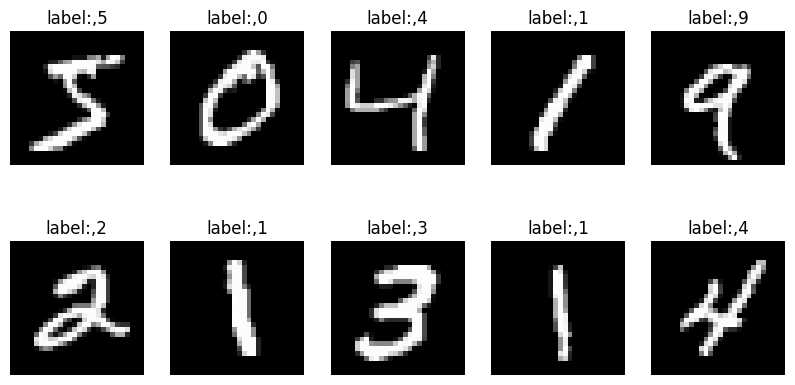

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[i],cmap='grey')
  plt.title(f'label:,{y_train[i]}')
  plt.axis('off')

plt.show()

3. 数据预处理

In [5]:
# 归一化
x_train = x_train/255.0
x_test = x_test/255.0

# 调整数据维度（添加通道维度，适应卷积网络）
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

# 独热编码标签
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)

## 构建神经网络模型
1. 构建神经网络结构
使用 keras Sequential API 构建一个卷积神经网络模型

In [6]:
model = tf.keras.Sequential([
    # 卷积层1 + 池化层1
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),

    ## 卷积层2 + 池化层2
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),

    # 全连接层
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2. 优化模型
配置优化器、损失模型和评估指标

In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## 训练模型和评估模型
1. 训练模型

In [8]:
history = model.fit(
    x_train,y_train,
    batch_size=64,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8500 - loss: 0.4861 - val_accuracy: 0.9762 - val_loss: 0.0781
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9800 - loss: 0.0659 - val_accuracy: 0.9841 - val_loss: 0.0566
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9866 - loss: 0.0442 - val_accuracy: 0.9823 - val_loss: 0.0606
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9890 - loss: 0.0356 - val_accuracy: 0.9876 - val_loss: 0.0453
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9928 - loss: 0.0233 - val_accuracy: 0.9878 - val_loss: 0.0452
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9941 - loss: 0.0181 - val_accuracy: 0.9875 - val_loss: 0.0445
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9938 - loss: 0.0166 - val_accuracy: 0.9886 - val_loss: 0.0430
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9959 - loss: 0.0122 - val_accuracy: 0.

2. 评估模型

In [9]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print(f"测试集准确率：{test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9863 - loss: 0.0504
测试集准确率：98.87%


3. 可视化训练过程

绘制训练和验证的准确率/损失函数

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) DejaVu Sans.
  fig.canvas

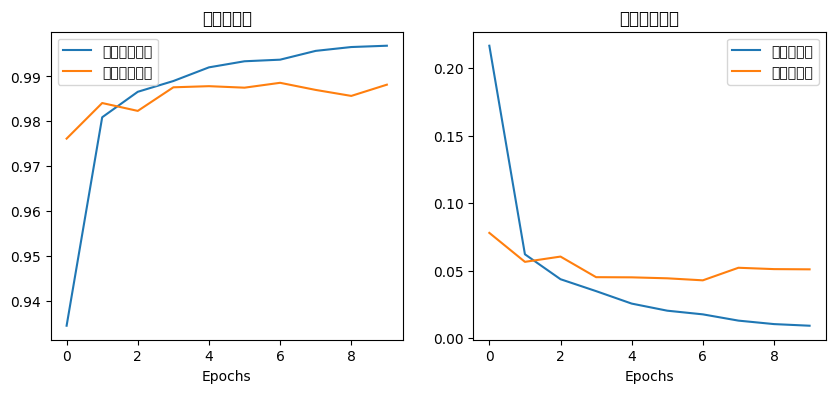

In [10]:
plt.figure(figsize=(10,4))
# 准确率曲线
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='训练集准确率')
plt.plot(history.history['val_accuracy'],label='验证集准确率')
plt.title('准确率变化')
plt.xlabel('Epochs')
plt.legend()

# 损失函数变化

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='训练集损失')
plt.plot(history.history['val_loss'],label='验证集损失')
plt.title('损失函数变化')
plt.xlabel('Epochs')
plt.legend()

plt.show()

## 模型预测和结果分析

1. 单张图片预测

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
预测标签：9，真实标签：9


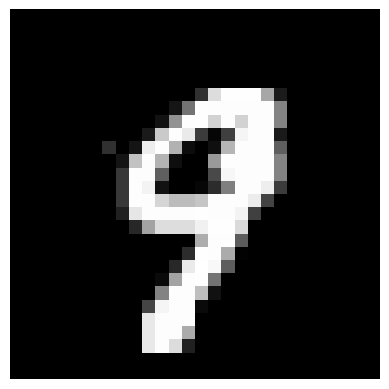

In [13]:
import numpy as np

index = np.random.randint(0,len(x_test))
plt.imshow(x_test[index].reshape(28,28),cmap='grey')
plt.axis('off')

# 模型预测
prediction = model.predict(x_test[index].reshape(1,28,28,1))
prediction_label = np.argmax(prediction)
true_label = np.argmax(y_test[index])

print(f'预测标签：{prediction_label}，真实标签：{true_label}')


2. 混淆矩阵分析

使用scikit-learn使用混淆矩阵，观察分类错误

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31614 (\N{CJK UNIFIED IDEOGRAPH-7B7E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas

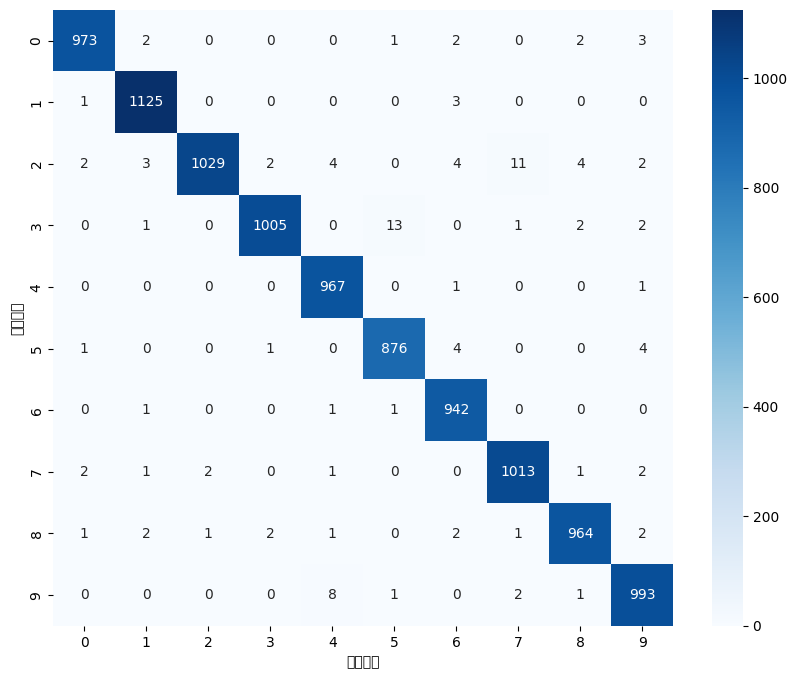

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test,axis=1)

cm = confusion_matrix(y_pred_labels, y_true_labels)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.show()